In [1]:
from timml import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [2]:
tiny = 1e-6
xy=[(-5, -5), (5, -5), (5, 5), (-5, 5)]
Nsides = len(xy)
xp = np.zeros(Nsides + 1, "d")
yp = np.zeros(Nsides + 1, "d")
z1 = np.zeros(Nsides, "D")
z2 = np.zeros(Nsides, "D")
for i in range(Nsides):
    xp[i] = xy[i][0]
    yp[i] = xy[i][1]
    z1[i] = complex(xp[i], yp[i])
xp[-1] = xy[0][0]
yp[-1] = xy[0][1]
z2[:-1] = z1[1:]
z2[-1] = z1[0]

In [3]:
print(z1)
print(z2)

[-5.-5.j  5.-5.j  5.+5.j -5.+5.j]
[ 5.-5.j  5.+5.j -5.+5.j -5.-5.j]


In [4]:
def initialize(xy):
    Nsides = len(xy)
    xp = np.zeros(Nsides + 1, "d")
    yp = np.zeros(Nsides + 1, "d")
    z1 = np.zeros(Nsides, "D")
    z2 = np.zeros(Nsides, "D")
    for i in range(Nsides):
        xp[i] = xy[i][0]
        yp[i] = xy[i][1]
        z1[i] = complex(xp[i], yp[i])
    xp[-1] = xy[0][0]
    yp[-1] = xy[0][1]
    z2[:-1] = z1[1:]
    z2[-1] = z1[0]
    
    # find center of area-sink
    xc = np.average(xp[:-1])
    yc = np.average(yp[:-1])
    xmin = min(xp)
    ymin = min(yp)
    xmax = max(xp) + 2.0 * tiny
    ymax = max(yp) + 2.0 * tiny
    
    return z1, z2, xmin, ymin, xmax, ymax

In [5]:
initialize(xy)

(array([-5.-5.j,  5.-5.j,  5.+5.j, -5.+5.j]),
 array([ 5.-5.j,  5.+5.j, -5.+5.j, -5.-5.j]),
 -5.0,
 -5.0,
 5.000002,
 5.000002)

In [6]:
def isinside(x, y, xy):
    """Check to see if point x,y is inside element and returns new points if at corner point"""
    
    z1, z2, xmin, ymin, xmax, ymax = initialize(xy)
    
    lengths = abs(z2 - z1)
    
    isinside = 0
    if x >= xmin and xmax and y >= ymin and y <= ymax:
        z = complex(x, y)
        zdis = abs(z - z1) / lengths
        if min(zdis) < tiny:
            for i in range(len(zdis)):
                if zdis[i] < tiny:
                    z = z + tiny * lengths[i]
                    x = z.real
                    y = z.imag
                    break
        bigZ = (2.0 * z - (np.array(z1) + np.array(z2))) / (
                np.array(z2) - np.array(z1)
        )
        bigZmin1 = bigZ - 1.0
        bigZplus1 = bigZ + 1.0
        angles = np.log(bigZmin1 / bigZplus1).imag
        angle = np.sum(angles)
        if angle > np.pi:
            isinside = True

    return isinside, x, y

In [7]:
def polygon_area(xy):
    n = len(xy)
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += xy[i][0] * xy[j][1]
        area -= xy[j][0] * xy[i][1]
    area = abs(area) / 2.0
    return area

In [8]:
isinside(1, 1, xy)

(True, 1, 1)

In [9]:
isinside(12, 12, xy)

(0, 12, 12)

In [10]:
isinside(5, 5, xy)

(0, 5.00001, 5.0)

In [11]:
def zetaj(x, y, xy):
    z = x + 1j*y
    z1, z2, xmin, ymin, xmax, ymax = initialize(xy)
    zetaj = (2*z - z1 - z2)/(z2 - z1)
    return zetaj

In [12]:
zetaj(0, 0, xy)

array([ 0.+1.j,  0.+1.j, -0.+1.j, -0.+1.j])

In [13]:
def zetajplus(x, y, xy):
    z = x + 1j*y
    z1, z2, xmin, ymin, xmax, ymax = initialize(xy)
    zetaplus = 2.0*(z - z1)/(z2 - z1)
    return zetaplus
def zetajminus(x, y, xy):
    z = x + 1j*y
    z1, z2, xmin, ymin, xmax, ymax = initialize(xy)
    zetaminus = 2.0*(z - z2)/(z2 - z1)
    return zetaminus

In [14]:
zetajplus(0, 0, xy)

array([1.+1.j, 1.+1.j, 1.+1.j, 1.+1.j])

In [15]:
zetajminus(0, 0, xy)

array([-1.+1.j, -1.+1.j, -1.+1.j, -1.+1.j])

In [16]:
def zetamplus(x, y, zy):
    z = x + 1j*y
    z1, z2, xmin, ymin, xmax, ymax = initialize(xy)
    zetamplus = 2*(z - z1[1:])/(z2[1:] - z1[1:])
    return zetamplus

def zetamminus(x, y, zy):
    z = x + 1j*y
    z1, z2, xmin, ymin, xmax, ymax = initialize(xy)
    zetamminus = 2*(z - z2[1:])/(z2[1:] - z1[1:])
    return zetamminus

In [17]:
zetamplus(0, 0, xy)

array([1.+1.j, 1.+1.j, 1.+1.j])

In [18]:
zetamminus(0, 0, xy)

array([-1.+1.j, -1.+1.j, -1.+1.j])

In [19]:
def etaj(x, y, xy):
    z1, z2, xmin, ymin, xmax, ymax = initialize(xy)
    return zetajplus(x, y, xy)*np.log(zetajminus(x, y, xy)/zetajplus(x, y, xy)) + 2*np.sum(np.log(zetamminus(x, y, xy)/zetamplus(x, y, xy)) + 2)

In [20]:
etaj(0, 0, xy)

array([10.42920367+10.99557429j, 10.42920367+10.99557429j,
       10.42920367+10.99557429j, 10.42920367+10.99557429j])

In [21]:
# valid outside the polygon. Eq 8.598
def comega(x, y, xy, gamma):
    
    inside, x, y = isinside(x, y, xy)
    
    area = polygon_area(xy)
    z1, z2, xmin, ymin, xmax, ymax = initialize(xy)
    z = x + 1j*y
    
    Ljsq = (z2-z1)*(z2-z1).conj()
    zj = zetaj(x, y, xy)
    ej = etaj(x, y, xy)
    
    comega = -gamma/(32*np.pi*i)*np.sum(Ljsq*(zj - zj.conj()) * ej + gamma * area/(2*np.pi) * np.log(z - z1))
    return comega

In [22]:
print(comega(0, 0, xy, 1).real)
print(comega(10, 10, xy, 1).real)
print(comega(5, 5, xy, 1).real)

28.753780415264544
-0.5557939866826137
-1.8585943336614652


In [23]:
# valid for points inside the polygon. Eq 8.594
def potinf(x, y, xy, gamma):
    inside, x, y = isinside(x, y, xy)
    z = x + 1j*y
    z1, z2, xmin, ymin, xmax, ymax = initialize(xy)
    area = polygon_area(xy)
    yj = zetaj(x, y, xy).conj() - zetaj(x, y, xy)

    Ljsq = (z2-z1)*(z2-z1).conj()
    ej = etaj(x, y, xy)
    
    pot = -gamma/(32*np.pi)*np.sum(yj*Ljsq*(ej + ej.conj()) + gamma*area/(4*np.pi)*(np.log(z - z1) + np.log(z.conjugate() - z1.conj())))
    
    return pot

In [24]:
print(potinf(0, 0, xy, 1))
print(potinf(10, 10, xy, 1))
print(potinf(5, 5.0001, xy, 1))

(-1.2386587542063605+165.98593171027443j)
(-1.66738196004784+169.59925048822356j)
(0.30966231383671755+171.50154097739946j)


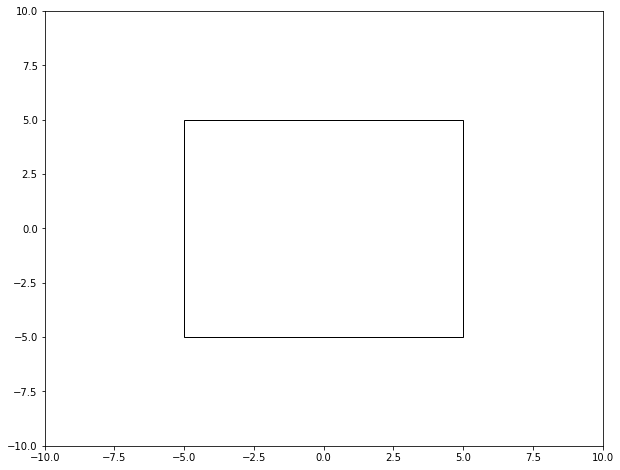

In [34]:
xg, yg = np.linspace(-10, 10, 100), np.linspace(-10, 10, 100)
nx, ny = len(xg), len(yg)
h = np.empty((ny, nx))
for j in range(ny):
    for i in range(nx):
        h[j, i] = potinf(xg[i], yg[j], xy, 1).real

plt.figure(figsize=(10,8))
plt.contour(xg, yg, h, levels=30)
fig = plt.gcf()
ax = plt.gca()
poly = Polygon(xy, closed=True, fill=False)
ax.add_patch(poly)

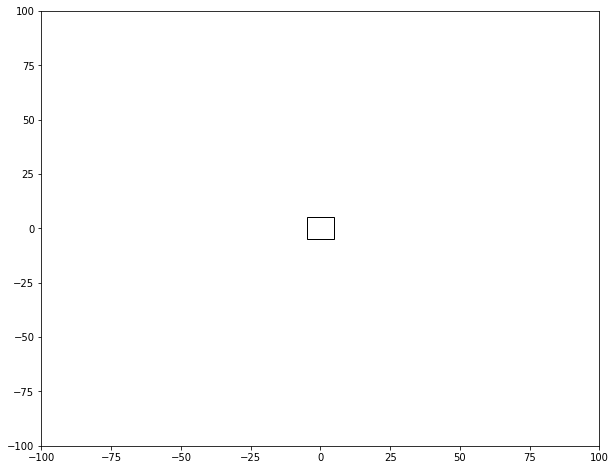

In [26]:
xg, yg = np.linspace(-100, 100, 100), np.linspace(-100, 100, 100)
nx, ny = len(xg), len(yg)
h = np.empty((ny, nx))
for j in range(ny):
    for i in range(nx):
        h[j, i] = potinf(xg[i], yg[j], xy, 1).real

plt.figure(figsize=(10,8))
plt.contour(xg, yg, h, levels=30)
fig = plt.gcf()
ax = plt.gca()
poly = Polygon(xy, closed=True, fill=False)
ax.add_patch(poly)

In [27]:
ml = ModelMaq()
well = Well(ml, xw=0, yw=0, Qw=100)
ml.solve()

h:\internal\jrj\github\timml\timml\aquifer.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  self.lab[1:] = 1.0 / np.sqrt(w[1:])


<a list of 5 text.Text objects>

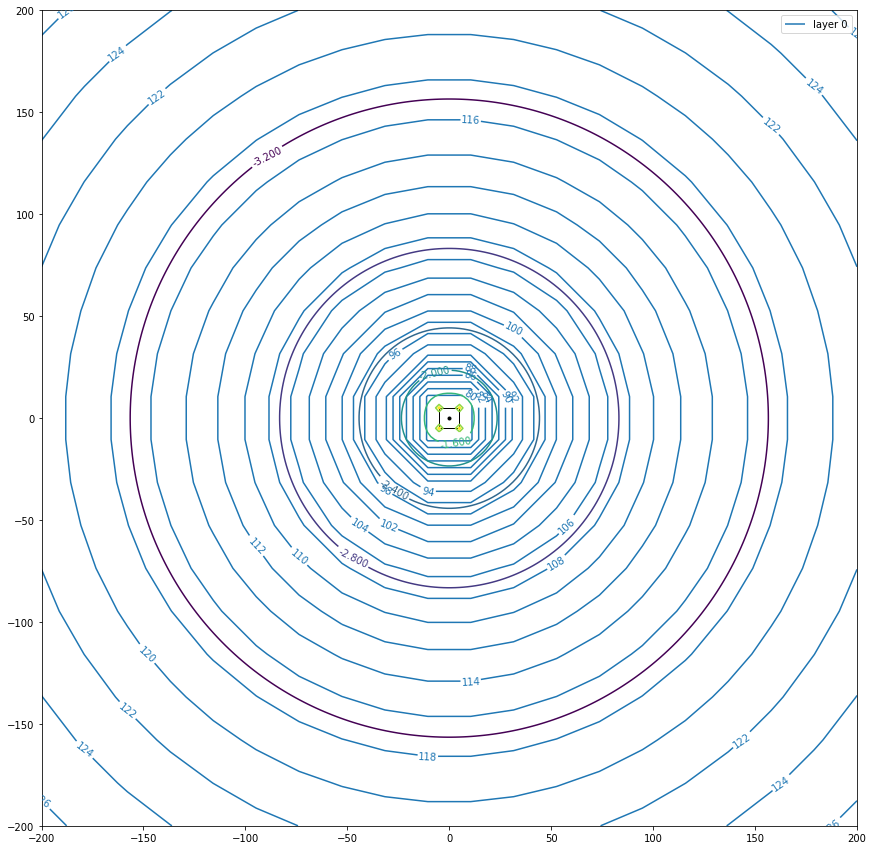

In [28]:
ml.contour(win=[-200, 200, -200, 200], levels=30, figsize=(20,15))
xg, yg = np.linspace(-200, 200, 200), np.linspace(-200, 200, 200)
nx, ny = len(xg), len(yg)
h = np.empty((ny, nx))
for j in range(ny):
    for i in range(nx):
        h[j, i] = potinf(xg[i], yg[j], xy, 1).real

plt.contour(xg, yg, h, levels=30)
fig = plt.gcf()
ax = plt.gca()
poly = Polygon(xy, closed=True, fill=False)
ax.add_patch(poly)
cs = ax.contour(xg, yg, h)
plt.clabel(cs)

In [29]:
xy=[(-5, -5), (5, -5), (5, 5), (-5, 5)]
ml = ModelMaq()
well = Well(ml, xw=0, yw=0, Qw=100)
poly = PolyAreaSink(ml, xy, N=0.01)
uf = Uflow(ml, slope=0.02, angle=0)
ml.solve()

In [30]:
poly.potinf(10, 10)

h:\internal\jrj\github\timml\timml\polyareasink.py:146: ComplexWarning: Casting complex values to real discards the imaginary part
  * (np.log(z - self.z1) + np.log(z.conjugate() - self.z1.conj()))


array([[-0.00016674]])

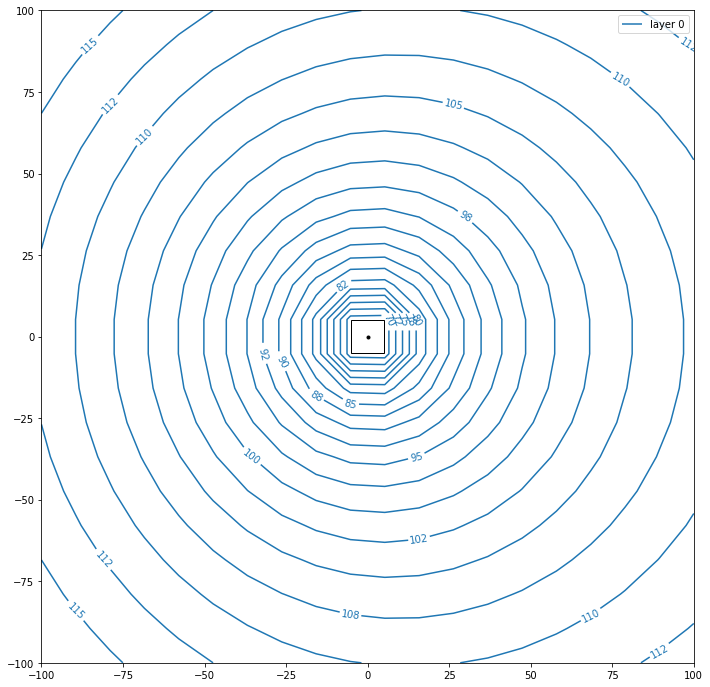

In [31]:
ml.contour(win=[-100, 100, -100, 100], figsize=(15, 12))

In [32]:
xy=[(-5, -5), (5, -5), (5, 5), (-5, 5)]
ml = ModelMaq()
#well = Well(ml, xw=0, yw=0, Qw=100)
poly = PolyAreaSink(ml, xy, N=0.001)
ml.solve()

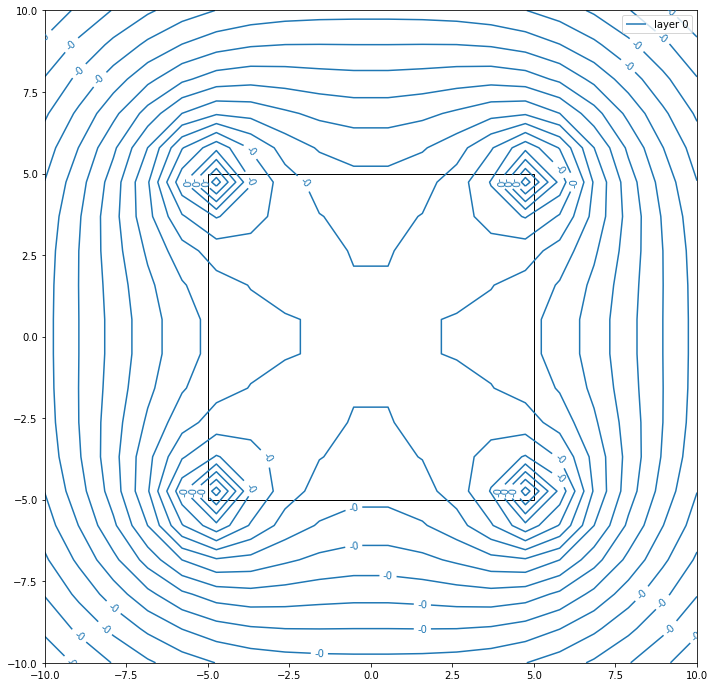

In [33]:
ml.contour(win=[-10, 10, -10, 10], figsize=(15, 12))

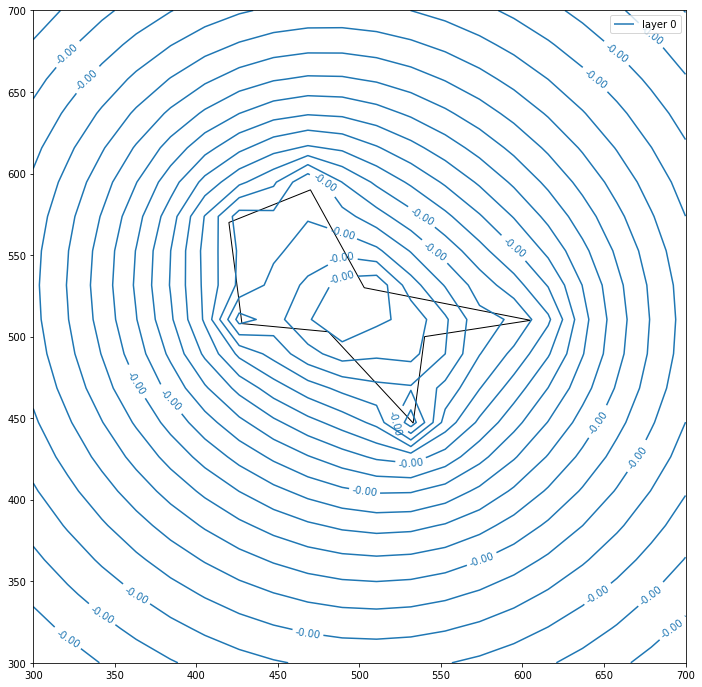

In [41]:
xy=[(428, 508), (481, 503), (533, 447), (540, 500), (605, 510), (503, 530), (470, 590), (420, 570)]
ml = ModelMaq()
#well = Well(ml, xw=0, yw=0, Qw=100)
poly = PolyAreaSink(ml, xy, N=0.001)
ml.solve()
ml.contour(win=[300, 700, 300, 700], figsize=(15, 12), decimals=2)